<a href="https://colab.research.google.com/github/kingseo4567/maritime-data-minig/blob/main/11%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-14-8cc78ece9710>:34: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-8cc78ece9710>:34: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-8cc78ece9710>:34: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-8cc78ece9710>:34: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-8cc78ece9710>:34: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-8cc78ece9710>:34: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-8cc78ece9710>:34: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipytho

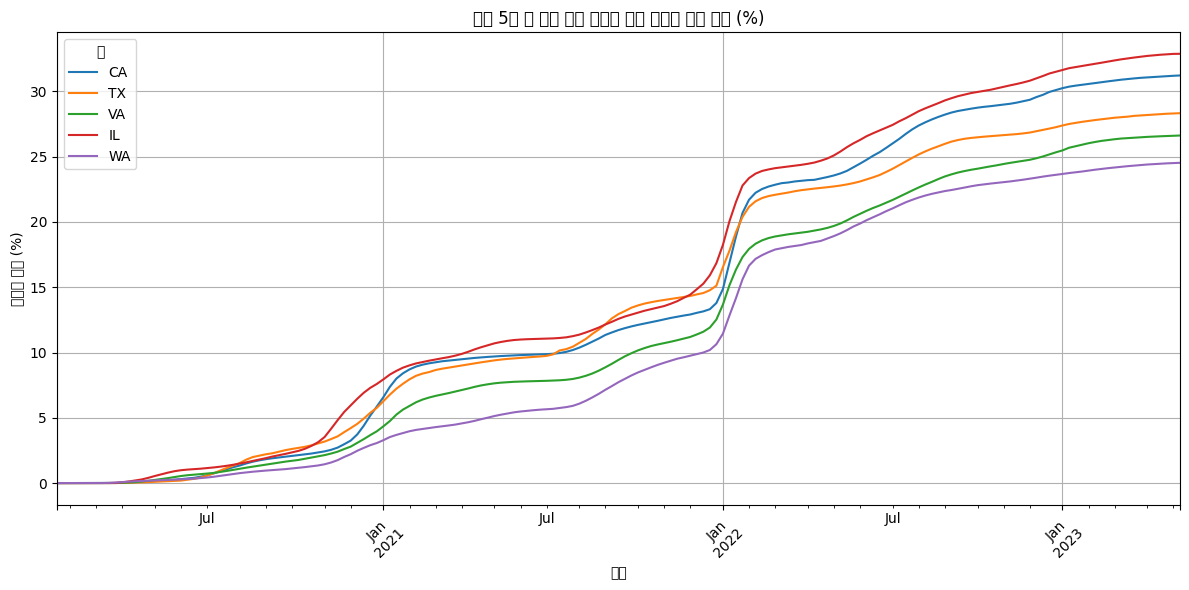

가장 최근 기준, 확진자 비율이 가장 낮은 주는 WA입니다. (24.53%)


In [14]:
#11주차 과제
# 미국 5개주 인구비례 확진자 수 비율 변동 추이분석

import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
df = pd.read_csv("Weekly_United_States_COVID-19_Cases_and_Deaths_by_State_-_ARCHIVED_20250528.csv")
df['date_updated'] = pd.to_datetime(df['date_updated'])

# 분석할 주 리스트 및 인구
states = ['CA', 'TX', 'VA', 'IL', 'WA']
population = {
    'CA': 39_240_000,
    'TX': 30_030_000,
    'VA': 8_680_000,
    'IL': 12_580_000,
    'WA': 7_980_000
}

# 주별 인구 대비 누적 확진자 비율 계산
state_frames = {}
for state in states:
    state_df = df[df['state'] == state][['date_updated', 'tot_cases']].copy()
    state_df.set_index('date_updated', inplace=True)
    state_df[state] = state_df['tot_cases'] / population[state] * 100
    state_frames[state] = state_df[[state]]

# 병합 및 시각화
final_df = pd.concat(state_frames.values(), axis=1).sort_index()
final_df.plot(figsize=(12,6), title='미국 5개 주 인구 대비 코로나 누적 확진자 비율 추이 (%)', ylabel='확진자 비율 (%)', xlabel='날짜', grid=True)
plt.xticks(rotation=45)
plt.legend(title="주")
plt.tight_layout()
plt.show()

# 코로나 상황이 가장 완화된 주 확인
latest = final_df.iloc[-1]
lowest_state = latest.idxmin()
print(f"가장 최근 기준, 확진자 비율이 가장 낮은 주는 {lowest_state}입니다. ({latest[lowest_state]:.2f}%)")